In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns
import datetime

import pathlib
from sklearn.model_selection import train_test_split

In [2]:
data_dir = 'bar_datasets'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png')))
print(f'Image Count : {image_count}')

Image Count : 95


In [3]:
durian_heatmap_dict = {
  'ripe' : list(data_dir.glob('ripe/*')),
   'unripe' : list(data_dir.glob('unripe/*')),
}

durian_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}
# print(f'Some the files : {durian_heatmap_dict['ripe'][:5]}')

In [4]:
str(durian_heatmap_dict['ripe'][0])

'bar_datasets\\ripe\\n_1 matang 1_value.png'

In [5]:
X, y = [], []


output_folder = "resized_images"

for durian_ripeness, images in durian_heatmap_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X.append(resized_img)
        y.append(durian_labels_dict[durian_ripeness])
        
        # Uncomment if you want to check all the resized images
        # output_name = f"{durian_ripeness}_{index}.jpg"
        # output_path = os.path.join(output_folder, output_name)
        # cv2.imwrite(output_path, resized_img)

In [6]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train = X_train / 255
X_test = X_test / 255
X_validation = X / 255

In [7]:
convDim = 5
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (convDim,convDim), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (convDim,convDim), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 70688)             0         
                                                                 
 dense (Dense)               (None, 8)                 5

In [8]:
EPOCH = 25
model_fit = model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_test, y_test)) 

Epoch 1/25
3/3 [==============================] - 3s 621ms/step - loss: 0.9827 - accuracy: 0.5455 - val_loss: 0.6377 - val_accuracy: 0.7931
Epoch 2/25
3/3 [==============================] - 2s 457ms/step - loss: 0.6608 - accuracy: 0.7273 - val_loss: 0.5820 - val_accuracy: 0.9655
Epoch 3/25
3/3 [==============================] - 2s 598ms/step - loss: 0.4856 - accuracy: 0.8485 - val_loss: 0.8774 - val_accuracy: 0.5172
Epoch 4/25
3/3 [==============================] - 3s 824ms/step - loss: 0.5663 - accuracy: 0.6667 - val_loss: 0.4275 - val_accuracy: 1.0000
Epoch 5/25
3/3 [==============================] - 2s 604ms/step - loss: 0.3828 - accuracy: 0.9848 - val_loss: 0.3520 - val_accuracy: 0.9655
Epoch 6/25
3/3 [==============================] - 2s 618ms/step - loss: 0.3902 - accuracy: 0.8030 - val_loss: 0.4762 - val_accuracy: 0.6207
Epoch 7/25
3/3 [==============================] - 2s 570ms/step - loss: 0.3143 - accuracy: 0.8485 - val_loss: 0.3376 - val_accuracy: 1.0000
Epoch 8/25
3/3 [====

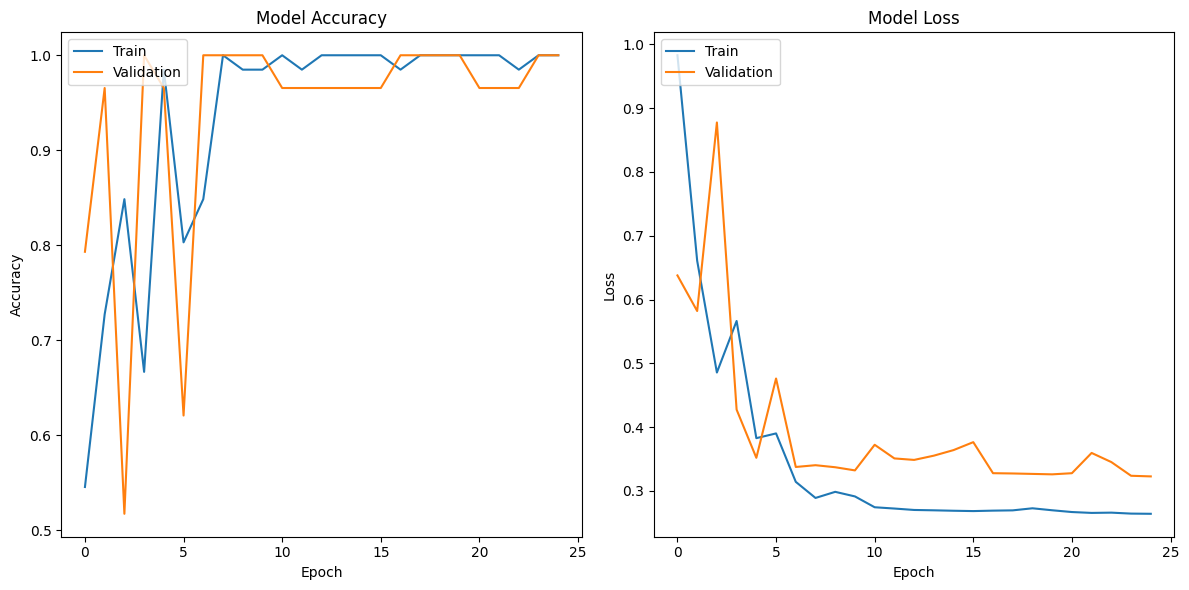

In [9]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

# save model to .keras file
now = datetime.datetime.now()
# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")
oke = date_time_str

plt.savefig(f"hasil training/{oke}.png")

plt.show()

In [10]:
predictions = model.predict(X_train)
predictions = np.round(predictions,2)
predictions

3/3 [==============================] - 0s 80ms/step


array([[0.  ],
       [0.  ],
       [0.51],
       [0.51],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.  ],
       [0.  ],
       [0.51],
       [0.51],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.51],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.51],
       [0.  ],
       [0.51],
       [0.  ],
       [0.  ],
       [0.51],
       [0.  ],
       [0.  ],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.51],
       [0.  ],
       [0.51],
       [0.  ],
       [0.  ],
       [0.51],
       [0.  ],
       [0.51],
       [0.51],
       [0.51],
       [0.  ],
       [0.51],
       [0.51],
       [0.  ],
       [0.  ],
       [0.51],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.04],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.51],
       [0.  ]], dtype=flo

In [16]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(f'Model Accuracy: {test_acc}')

1/1 - 0s - loss: 0.3228 - accuracy: 1.0000 - 128ms/epoch - 128ms/step
Model Accuracy: 1.0


In [12]:
# model = tf.keras.models.load_model('saved_model/28042024-182139.keras')

1/1 [==============================] - 0s 174ms/step


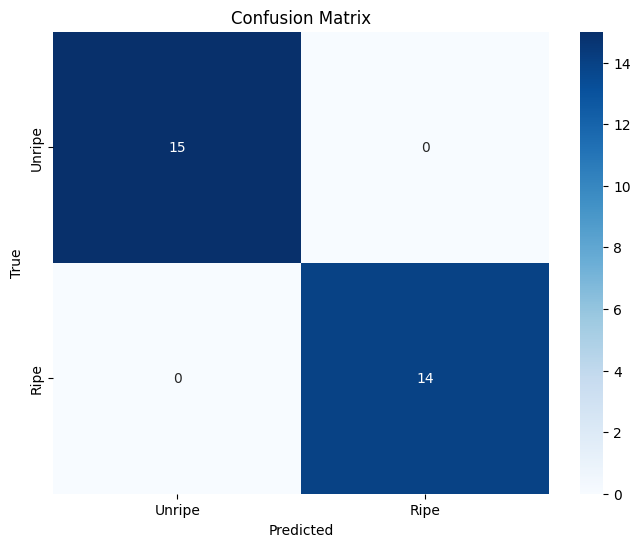

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1])

In [13]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
y_test

In [14]:
# save model to .keras file
now = datetime.datetime.now()
# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")
oke = date_time_str

In [15]:
# model.save(f"{oke}.keras")